In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette_hc = ['#ffffff', '#ddaa33', '#bb5566', '#004488', '#000000']

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

import seaborn as sns

from tqdm.auto import tqdm

import time
import os
from collections import OrderedDict
import json
import pickle

import gc

import sys
sys.path.append("../")

from src.helpers import calculate_RMSE_balanced, calculate_RMSE, Timer, autoscaling, \
                        calculate_composite_RMSE_V_CaT, update_array_from_kwargs, get_value_by_key

from src.postprocessing import collect_results, create_C_S

idx = pd.IndexSlice

# From cluster

In [2]:
cluster_name = "pikunov.av@calc.cod.phystech.edu"
folder_name_src = "/home/common/pikunov.av/pypoptim/results/voigt"
folder_name_dst = "../results/koivumaki/voigt"

folder_name_dst = os.path.abspath(folder_name_dst)

case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
#case_list = "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"

case_list = "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 
case_list += 'G3/C5/210204_094751', 'G4/C3/210204_174434', 'G4/C4/210205_013028', 'G4/C2/210205_095852'

# kernik
folder_name_src = "/home/common/pikunov.av/pypoptim/results/kernik_clancy/syn"
folder_name_dst = "../results/kernik_clancy/syn"
case_list = "210206_175442", "210206_201628"

case_list = "210210_111426", "210211_064429",# "210209_223739", # "210208_185315",# "210208_142104", "210208_144953"#"210208_115045", "210208_111459", "210208_144953", 


item_list = ['dump_last.npy',
             'dump.bin',
             'phenotype/*.csv',
             'config_backup.pickle']

text = ""

for case in case_list:
    
    folder_name = os.path.join(folder_name_dst, case)
    os.makedirs(folder_name, exist_ok=True)
    
    for item in item_list:
        src = os.path.join(folder_name_src, case, item)
        head, _ = os.path.split(item)
        if head:
            dst = os.path.join(folder_name_dst, case, head)
            os.makedirs(dst, exist_ok=True)
        else:
            dst = os.path.join(folder_name_dst, case)
            
        dst = os.path.abspath(dst)
            
        request = f"scp -r {cluster_name}:{src} {dst}\n"
        text += request
        
filename_script = "../misc/from_cluster.sh"
with open(filename_script, 'w') as f:
    f.write(text)

In [3]:
%%bash

bash ../misc/from_cluster.sh

# Data loading

In [452]:
case_list = 'G3/C1/201224_215531', 'G3/C1/201224_210103', 'G3/C1/201223_220723', 
#case_list = 'G4/C8/201223_232912',
#case_list = 'G2/C2/201224_125711',
#case_list = 'G1/C1/201225_092709',

case_list = 'G3/C1/201223_220723', 
case_list = 'G3/C1/210113_133246',
case_list = 'G3/C1/210114_012849',

case_list = 'G3/C1/210114_153411',
#case_list = 'G3/C1/210114_154059',
#case_list = 'G3/C1/210114_154032',

#case_list = 'G3/C1/210114_153411', 'G3/C1/210114_154059', 'G3/C1/210114_154032'

# ical_ghk
# case_list = "G1/C1/210115_115857", # 3D ok
# case_list = "G2/C2/210115_183711", # 3D ok
case_list = 'G3/C1/210114_153411', 'G3/C1/210115_113955',
case_list = "G4/C8/210116_070854",

# case_list = "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', "G4/C8/210116_070854"

# ical_ghk_tor
# case_list = "G1/C1/210118_200016",
# case_list = "G2/C2/210119_054105",
# case_list = "G3/C1/210118_195415",
# case_list = "G4/C8/210120_003000",

# case_list = "G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000"

#ical_ghk + ical_gh_tor
case_list = ["G1/C1/210118_200016", "G2/C2/210119_054105", "G3/C1/210118_195415", "G4/C8/210120_003000",
             "G1/C1/210115_115857", "G2/C2/210115_183711", 'G3/C1/210114_153411', 'G3/C1/210115_113955', "G4/C8/210116_070854",
             ]

case_list = "G3/C1/210121_202018", "G3/C1/210121_202452"

In [2]:
# rel
case_list = "G1/C1/210122_051129", "G2/C2/210122_082053", "G3/C1/210121_212326", "G4/C8/210122_001806"
case_list += "G1/C1/210122_221831", "G2/C2/210123_122249", "G3/C1/210122_142150", "G4/C8/210123_031303"
case_list += "G1/C3/210126_181937", "G2/C4/210127_032432", "G3/C2/210127_141706"

In [56]:
case_list = 'G3/C1/210121_212326',

In [79]:
case_list = 'G3/C1/210204_143557',

In [10]:
# koivumaki
case_list = "G1/C2/210203_181931", "G2/C2/210204_030703", 'G3/C5/210204_094751', 'G4/C3/210204_174434', 'G4/C4/210205_013028',# 'G4/C2/210205_095852'
case

In [68]:
# kernik_clancy
#case_list = ,
case_list = "210208_111459", "210208_115045", "210208_142104", "210208_144953", "210208_185315"


In [14]:
output_list = []

dirname_results = "../results/maleckar/voigt"
dirname_results = "../results/koivumaki/voigt"
dirname_results = "../results/voigt"
dirname_results = "../results/kernik_clancy/syn"


for case in tqdm(case_list):
    
    output_dict = collect_results(case, dirname_results, load_dump=True)
    #del output_dict['dump']
    gc.collect()
    output_list.append(output_dict)
    
    #break
    
#     dirname_report = os.path.join("../images/maleckar/reports/", case)
#     os.makedirs(dirname_report, exist_ok=True)

  0%|          | 0/2 [00:00<?, ?it/s]

phenotype:   0%|          | 0/4 [00:00<?, ?it/s]

phenotype:   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
output_list[0]['dump_last']

common                                                               \
         fitness g_K1_scaler g_Kr_scaler g_Ks_scaler g_to_scaler g_CaL_scaler   
0      -1.177842    2.260257    0.967280    1.449354    1.312388     1.140229   
1      -1.185072    2.206246    0.975840    1.454189    1.322086     1.124737   
2      -1.188163    2.303261    0.957563    1.465352    1.325795     1.140039   
3      -1.189064    2.253377    0.977266    1.379542    1.316056     1.147865   
4      -1.190116    2.276151    0.975861    1.388419    1.273958     1.138602   
...          ...         ...         ...         ...         ...          ...   
8187 -574.842907    0.413615    0.549205    6.120746    0.185891     1.175926   
8188        -inf    2.140842    1.762859    1.169520    6.400575     0.166727   
8189        -inf    0.359383    3.886585    6.771922    0.163201     0.719833   
8190        -inf    0.307166    0.698855    0.453928    4.207110     2.887808   
8191        -inf    1.350190    0.519068    2.027252    1.023440     4.102790   

                                                       ...               \
     g_CaT_scaler g_Na_scaler g_f_scaler kNaCa_scaler  ... g_PCa_scaler   
0        0.843520    1.052649   0.881153     1.580557  ...     1.839475   
1        0.805357    1.036066   0.856990     1.594281  ...     1.805695   
2        0.813376    1.078189   0.920030     1.571301  ...     1.829346   
3        0.806683    1.071919   0.893404     1.580136  ...     1.834682   
4        0.868767    1.054115   0.876735     1.579653  ...     1.838399   
...           ...         ...        ...          ...  ...          ...   
8187     1.033276    2.310887   0.291673     0.518245  ...     0.143112   
8188     0.262277    0.457064   2.002909     0.273978  ...     2.771987   
8189     0.764877    2.163132   0.748716     6.646291  ...     2.171937   
8190     9.103472    1.663422   0.345790     4.710845  ...     0.135792   
8191     6.998290    0.199153   2.188010     4.284770  ...     6.138532   

           2000                             1000                        \
            Nai          Ki     Ca_SR        Nai          Ki     Ca_SR   
0      6.137749  104.930095  0.243441   6.990286  101.573421  0.256005   
1      6.136579  104.987295  0.250784   6.983939  101.554297  0.260955   
2      6.142387  104.831598  0.245731   6.970394  101.631058  0.257850   
3      6.160240  104.905181  0.247065   7.019404  101.570470  0.260025   
4      6.226893  104.965717  0.245774   6.997054  101.739568  0.262249   
...         ...         ...       ...        ...         ...       ...   
8187  11.998928  117.610318  0.160322   6.412061   86.305770  0.592634   
8188   6.769874   92.976151  0.014802  16.063366   84.936243  0.104322   
8189   3.921047  103.611030  0.223090   6.827272  100.957852  0.223588   
8190   7.684399  116.055265  0.260399  16.499057  115.468112  1.086388   
8191   3.937560  105.842062  0.067114   5.858624  102.316036  0.424835   

            500                        
            Nai          Ki     Ca_SR  
0      8.595223  101.773538  0.267049  
1      8.612098  101.440969  0.275054  
2      8.598561  101.785086  0.268578  
3      8.639571  101.698670  0.270956  
4      8.598074  101.636815  0.270551  
...         ...         ...       ...  
8187  13.814497  118.232735  1.727974  
8188   8.647147   82.044050  0.602482  
8189   8.451906  101.686905  0.283718  
8190  15.029085  107.967345  1.402595  
8191   8.949688  102.754377  0.421679  

[8192 rows x 26 columns]

In [7]:
columns_tuples = []

for output in output_list:
    tag, genes = output['trio'], output['genes']
    for exp_cond in genes:
        for gene in genes[exp_cond]:
            t = (exp_cond, gene)
            if t not in columns_tuples:
                columns_tuples.append(t)
                
columns_tuples = [('common', 'fitness')] + columns_tuples
                
m_index = pd.MultiIndex.from_tuples(columns_tuples)

index_tuples = [x['trio'] for x in output_list]
m_index_index = pd.MultiIndex.from_tuples(index_tuples)

df_sol = pd.DataFrame([[None for item in columns_tuples]] * len(output_list),
                      columns=m_index, index=m_index_index)

for i, output in enumerate(output_list):
    trio, genes, values = output['trio'], output['genes'], output['dump_last'].iloc[0]
    columns_i = [(item[0], key) for item in genes.items() for key in item[1]]
    columns_i = [('common', 'fitness')] + columns_i
    for j, c in enumerate(columns_i):
        df_sol.loc[trio, c] = values[j]
        
df_sol.index.names = ['Group', 'Cell', 'Case']
df_sol = df_sol.T.sort_index(axis='columns')

In [8]:
0.051738 * 5e-5 * 50

0.000129345

In [9]:
df_sol

Group                          NaN              
Cell                           NaN              
Case                 210210_111426 210211_064429
common fitness           -1.177842     -2.763013
       g_K1_scaler        2.260257      1.622769
       g_Kr_scaler        0.967280      0.899473
       g_Ks_scaler        1.449354      0.503520
       g_to_scaler        1.312388      0.933733
       g_CaL_scaler       1.140229      0.756510
       g_CaT_scaler       0.843520      1.315233
       g_Na_scaler        1.052649      0.829180
       g_f_scaler         0.881153      0.189128
       kNaCa_scaler       1.580557      0.834059
       VmaxUp_scaler      0.109443      0.109651
       ks_scaler          0.194182      2.884514
       V_leak_scaler      0.447551      3.772356
       PNaK_scaler        1.110378      1.481251
       g_b_Na_scaler      0.622411      2.685610
       g_b_Ca_scaler      1.370861      1.644773
       g_PCa_scaler       1.839475      2.078721
2000   Nai                6.137749      4.237501
       Ki               104.930095    111.999666
       Ca_SR              0.243441      0.029266
1000   Nai                6.990286      4.597721
       Ki               101.573421    110.313842
       Ca_SR              0.256005      0.035554
500    Nai                8.595223      5.425733
       Ki               101.773538    108.914011
       Ca_SR              0.267049      0.036616

In [10]:
#df_sol.to_csv("../misc/syn/sol.csv")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

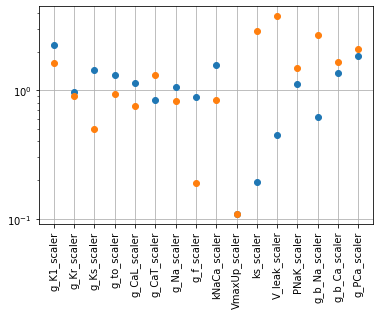

In [11]:
fig, ax = plt.subplots()

df = df_sol.loc['common'][1:]

plt.plot(df, 'o')

plt.yscale('log')

plt.grid()

plt.xticks(rotation=90)

In [21]:
#df_sol.to_csv("../misc/kc_solutions.csv")

In [22]:
# fig, ax = plt.subplots(figsize=(4, 2))

# sns.swarmplot(x=np.log10(df_sol.loc[('common', 'tau_tr')].values.astype(float)), ax=ax)

# plt.grid()

# plt.title('tau_tr, log10')

# plt.tight_layout()

#plt.savefig("../images/maleckar/tau_tr.png", dpi=300, facecolor='white')

In [23]:
#df_sol.to_csv("../../../projects/rheeda/tau_tr_coeffs.csv")

In [10]:
df_states = []

for output in output_list:
    phenotype_model_last = output['phenotype_model_last']
    x = pd.concat({key : value.iloc[0] for key, value in phenotype_model_last.items()}, axis=1)
    m_index = pd.MultiIndex.from_tuples((output['trio'] + (int(CL),) for CL in phenotype_model_last.keys()))
    m_index.names = 'Group', 'Cell', 'Case', 'CL'
    x = pd.DataFrame(x.values, index=x.index, columns=m_index)
    df_states.append(x)
    
df_states = pd.concat(df_states, axis=1).sort_index(axis='columns')

In [11]:
df_states

Group               NaN                        
Cell                NaN                        
Case      210209_223739                        
CL                 500         1000        2000
V            -76.976166  -76.390550  -74.763028
Ca_SR          0.146715    0.115789    0.071586
Cai            0.000152    0.000054    0.000040
Nai            5.033809    4.468383    4.228755
Ki           105.145212  106.992721  106.038575
Ca_ligand      0.000000    0.000000    0.000000
d              0.000323    0.000352    0.000445
f1             0.322038    0.700877    0.948801
fCa            0.992808    1.006246    1.006998
Xr1            0.063399    0.000560    0.000531
Xr2            0.466158    0.459550    0.441293
Xs             0.064898    0.058313    0.063388
h              0.774493    0.760281    0.717786
j              0.250870    0.555948    0.703458
m              0.025115    0.026992    0.032949
Xf             0.017313    0.045343    0.064608
s              0.960185    0.983973    0.980403
r              0.000236    0.000249    0.000288
dCaT           0.000215    0.000237    0.000310
fCaT           0.924751    0.933095    0.911885
R              0.012659    0.034148    0.049142
O              0.000064    0.000021    0.000016
I              0.004971    0.000583    0.000300
a_ur           0.000260    0.000278    0.000337
i_ur           0.536461    0.689226    0.848279

In [25]:
#df_states.to_csv("../misc/kc_states.csv")

In [116]:
with open("/home/andrey/WORK/HPL/Code/pypoptim/results/voigt/G1/C3/210204_195958/organism_best.pickle", 'br') as f:
    org = pickle.load(f)

# Analisys

In [21]:
dump = output_list[0]['dump']
loss = -dump.loc[idx[:, 0], :].iloc[:, 0]

In [22]:
from sklearn.metrics import pairwise_distances

In [25]:
m_list = []

for i in tqdm(range(0, len(loss), 50)):

    df = dump['common'].iloc[:, 1:].loc[i]
    m = pairwise_distances(df, n_jobs=-1)
    m_list.append(m.mean())

  0%|          | 0/40 [00:00<?, ?it/s]

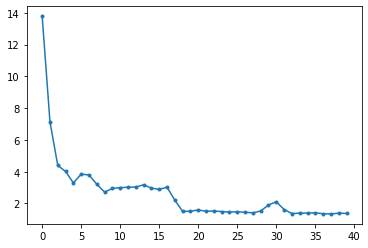

In [27]:
plt.plot(m_list, '.-')

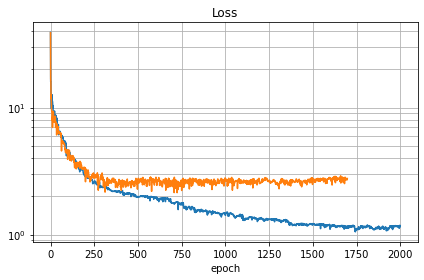

In [20]:
for i in range(len(output_list)):

    dump = output_list[i]['dump']
    loss = -dump.loc[idx[:, 0], :].iloc[:, 0]

    plt.semilogy(loss.values,
                 #color=palette_hc[-2],
                )
    
plt.grid(True, which='both')
plt.title('Loss')
plt.xlabel('epoch')
plt.tight_layout()

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)     

# plt.savefig(os.path.join(dirname, "loss.png"), dpi=600)

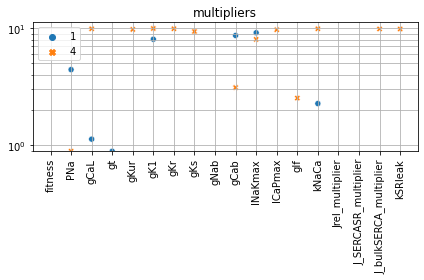

In [23]:
sns.scatterplot(data=df_sol.loc['common'])
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.yscale('log')
plt.grid(which='both')
plt.title('multipliers')

plt.tight_layout()

#plt.savefig("./images/koivumaki/reports/Fri_Dec_4_mults.png", dpi=300)

KeyError: 'Na_i'

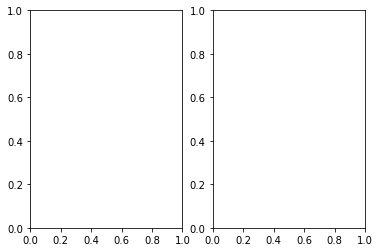

In [51]:
fig, axes = plt.subplots(ncols=2)

for i, item in enumerate(['Na_i', 'K_i']):
    plt.sca(axes[i])
    df = df_sol.loc[idx[:, item]].T.unstack().copy()
    df.index = df.index.astype('str')
    sns.scatterplot(data=df)
    plt.setp(plt.gca().get_xticklabels(), rotation=90)
    plt.grid()
    plt.title(item)
    plt.xlabel('CL')
    
plt.tight_layout()

#plt.savefig("./images/koivumaki/reports/Fri_Dec_4_params.png", dpi=300)

In [10]:
phenotype_model = {}
phenotype_model_last = {}
gc.collect()


for exp_cond_name in tqdm(config['experimental_conditions']):
    
    if exp_cond_name == 'common':
        continue
    
    if True:
        index_col = ['epoch', 'index']
        usecols = index_col + ['V',
                               #'Cai1', 'Cai2', 'Cai3', 'Cai4', 'Cass',
                               #'Nai', 'Ki',
                               'Na_i', 'K_i',
                               ] 

        filename = os.path.join(config_path, "phenotype", f"phenotype_{exp_cond_name}.csv")
        if os.path.isfile(filename):
            try:
                phenotype_model_last[exp_cond_name] = pd.read_csv(filename,
                                                                  #usecols=usecols
                                                                 )
                phen_len = len(phenotype_model_last[exp_cond_name])
            except pd.errors.EmptyDataError as e:
                print(f'{filename} is empty')
                continue

    
            if False:
                filename = os.path.join(config_path, "phenotype", f"phenotype_{exp_cond_name}.bin")    
                phenotype_model[exp_cond_name] = np.fromfile(filename, dtype=np.float32).reshape(-1, len(config['runtime']['states_initial']))

                n_epochs = len(phenotype_model[exp_cond_name]) // phen_len

                m_index_tuples = [(epoch, index) for epoch in range(n_epochs) for index in range(phen_len)]
                m_index = pd.MultiIndex.from_tuples(m_index_tuples)

                phenotype_model[exp_cond_name] = pd.DataFrame(phenotype_model[exp_cond_name],
                                                              index=m_index,
                                                              columns=phenotype_model_last[exp_cond_name].columns)

  0%|          | 0/5 [00:00<?, ?it/s]

In [24]:
#dump.columns.levels

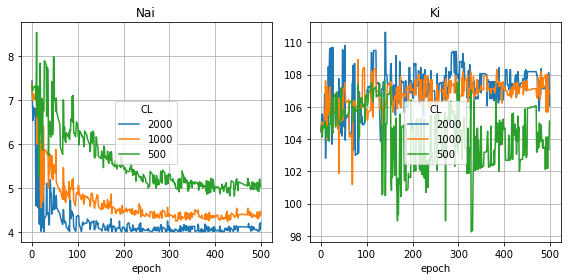

In [20]:
items = ['Nai', 'Ki']
#items = ['Na_i', 'K_i']


nrows = 1
ncols = len(items)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         #sharex='col', sharey='row',
                        )

for i, item in enumerate(items):
    plt.sca(axes[i])
    for column in dump:
        if item not in column:
            continue
        #max_epoch = dump.index[-1][0]
        #x_space = np.linspace(0, max_epoch, len(dump))
        plt.plot(dump.loc[idx[:, 0], column].values, label=column[0])
    plt.legend(title='CL', loc='center')
    plt.xlabel('epoch')
    plt.grid()
    plt.title(item)

# dirname = os.path.join("../images/maleckar/reports/", case,)
# os.makedirs(dirname, exist_ok=True)                

plt.tight_layout()
#plt.savefig(os.path.join(dirname, "concentrations.png"), dpi=600)

In [15]:
[(i, output['trio']) for i, output in enumerate(output_list)]

[(0, (1, 2, '210201_225221')), (1, (4, 1, '210201_232420'))]

In [29]:
%matplotlib

Using matplotlib backend: Qt5Agg


CL = 2000, rmse_V = 4.642e-01
CL = 1000, rmse_V = 4.482e-01
CL = 500, rmse_V = 2.654e-01
CL = 2000, rmse_V = 8.133e-01
CL = 1000, rmse_V = 8.408e-01
CL = 500, rmse_V = 9.147e-01


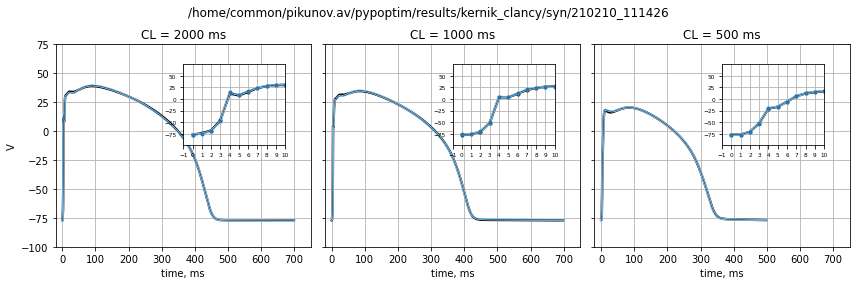

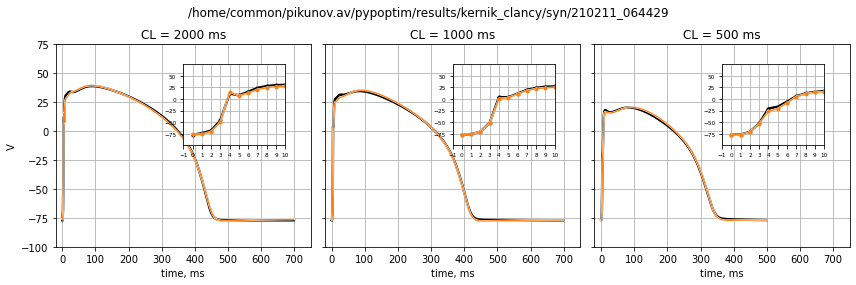

In [13]:
for i_output in range(len(output_list)):

    nrows = 1
    ncols = 3 #5 # len(exp_cond_dict)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols),
                             sharex='col', sharey='row')

    config = output_list[i_output]['config']
    phenotype_model_last = output_list[i_output]['phenotype_model_last']

    exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

    item = 'V'

    for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

        ax = axes[i_cond]
        ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])

        exp = exp_cond['phenotype']['V']
        model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

        exp, model = map(lambda x: np.roll(x, 1), [exp, model])

        rmse = calculate_RMSE(exp, model)

        ax.set_yticks(np.arange(-100, 75 + 1, 25))
        ax.set_ylim(-100, 75)

        print(f"CL = {exp_cond_name}, rmse_{item} = {rmse:.3e}")

        if i_cond == 0:
            ax.set_ylabel(item)

        for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):

            ax_.plot(exp, ml, color='w', lw=3)
            ax_.plot(exp, ml,
                     color='k', #color=palette_hc[3],
                     lw=2.5, label='exp')

            ax_.plot(model, ml, color='w', lw=2)
            ax_.plot(model, ml,
                     color=f"C{i_output}", #palette_hc[2],
                     lw=1.25, label='model')

        ax.set_title(f'CL = {exp_cond_name} ms')
        ax.set_xlabel('time, ms')

        xlim_right = 750
        ax.set_xticks(np.arange(0, xlim_right+1, 100))
        ax.set_xlim(-20, xlim_right)

        xlim_right_inset = 10
        ax_inset.set_xlim(-1, xlim_right_inset)
        ax_inset.set_ylim(ax.get_ylim())
        ax_inset.set_yticks(ax.get_yticks()[1:-1])
        ax_inset.set_xticks(np.arange(-1, xlim_right_inset+1, 1))
        ax_inset.tick_params(axis='both', labelsize='xx-small')

        for ax_ in ax, ax_inset:
            ax_.grid(True)

    fig.align_labels()
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    fig.suptitle(config['runtime']['output_folder_name'])

    # dirname = os.path.join("../images/maleckar/reports/", case,)
    # os.makedirs(dirname, exist_ok=True)               
    dirname = "../misc/syn/"
    #plt.savefig(os.path.join(dirname, f"waveforms_101_beats.png"), dpi=600, facecolor='white')

In [27]:
config['runtime']['output_folder_name']

'/home/common/pikunov.av/pypoptim/results/kernik_clancy/syn/210208_111459'

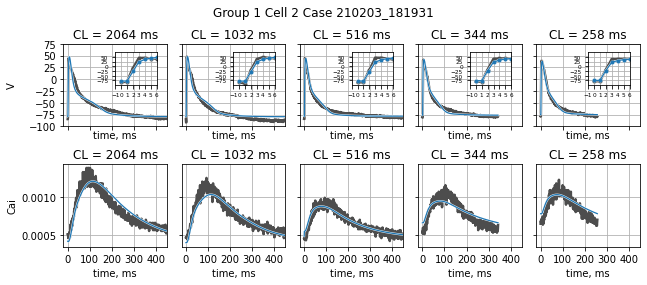

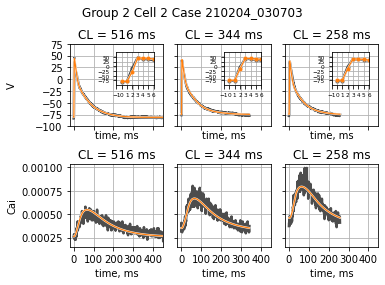

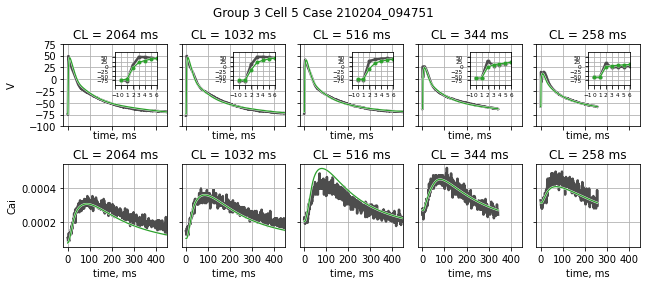

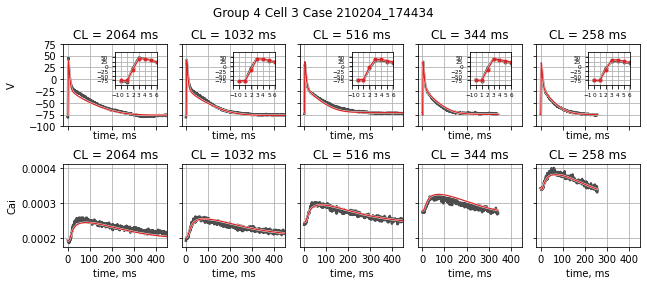

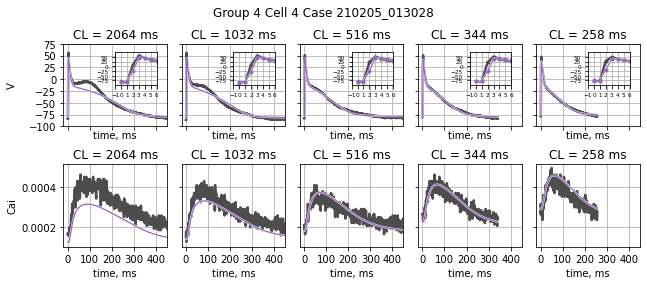

In [43]:
for i_output in range(5):
    
    output = output_list[i_output]

    config = output['config']
    exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']
    phenotype_model_last = output['phenotype_model_last']

    nrows = 2
    ncols = len(phenotype_model_last)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows * 1.1 / ncols),
                             sharex='col', sharey='row')


    for i_item, item in enumerate(['V', 'Cai']):

        for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

            ax = axes[i_item, i_cond]

            ax.set_title(f'CL = {exp_cond_name} ms')
            ax.set_xlabel('time, ms')

            xlim_right = 450
            ax.set_xticks(np.arange(0, xlim_right+1, 100))
            ax.set_xlim(-20, xlim_right)

            ax.grid(True)

            exp = exp_cond['phenotype'][item]

            if item == 'Cai':

                ax_inset = None

                legend = config['runtime']['legend'] 
                volumes = legend['constants'][['Vss'] + [f'Vnonjunct{i}' for i in range(1, 4 + 1)]]
                concentrations = phenotype_model_last[exp_cond_name][['Cass'] + [f'Cai{i}' for i in range(1, 4 + 1)]]
                Cai_mean = (concentrations.values * volumes.values).sum(axis=1) / sum(volumes)
                Cai_mean = Cai_mean[:len(exp)]

                model = Cai_mean

    #             ax.set_yticks(np.arange(0, 0.0011, 0.00025))
    #             ax.set_ylim(0, 0.001)

            else:

                ax.set_yticks(np.arange(-100, 75 + 1, 25))
                ax.set_ylim(-100, 75)

                ax_inset = ax.inset_axes([0.5, 0.5, 0.4, 0.4])

                ax_inset.set_xlim(-1, 6)
                ax_inset.set_ylim(ax.get_ylim())
                ax_inset.set_yticks(ax.get_yticks()[1:-1])
                ax_inset.set_xticks(np.arange(-1, 6+1, 1))
                ax_inset.tick_params(axis='both', labelsize='xx-small')

                ax_inset.grid(True)

                model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]

            exp, model = map(lambda x: np.roll(x, 1), [exp, model])

    #         rmse = calculate_RMSE(exp, model)
    #         print(f"CL = {exp_cond_name}, rmse_{item} = {rmse:.3e}")

            if i_cond == 0:
                ax.set_ylabel(item)

            for ml, ax_ in zip(['-', '.-'], [ax, ax_inset]):

                if ax_ is None:
                    continue

                ax_.plot(exp, ml, color='w', lw=3)
                ax_.plot(exp, ml, color='0.3', lw=2.5, label='exp')

                ax_.plot(model, ml, color='w', lw=2)
                ax_.plot(model, ml,
                         color=f'C{i_output}', #color='C3',
                         lw=1.25, label='model')

    fig.align_labels()
    plt.tight_layout()

    plt.subplots_adjust(top=0.85)
    fig.suptitle('Group {} Cell {} Case {}'.format(*output['trio']))

    # dirname = os.path.join("../images/maleckar/reports/", case,)
    # os.makedirs(dirname, exist_ok=True) 

    filename_save = "../images/voigt/" + '_'.join(map(str, output['trio'])) + '.png'

    plt.savefig(filename_save, dpi=600, facecolor='white')

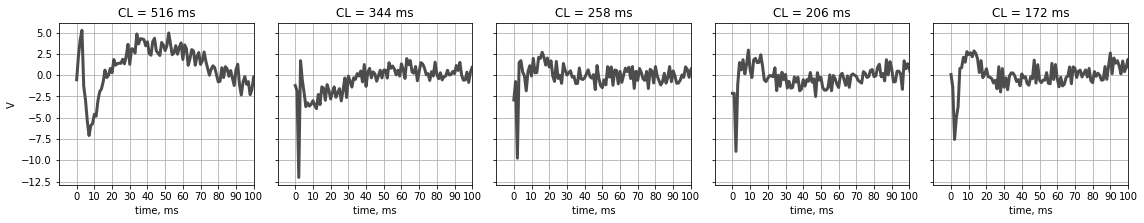

In [18]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']


nrows = 1
ncols = len(exp_cond_dict)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=plt.figaspect(nrows / ncols),
                         sharex='col', sharey='row')

item = 'V'

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    ax = axes[i_cond]

    exp = exp_cond['phenotype']['V']
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    exp, model = map(lambda x: np.roll(x, 1), [exp, model])

#     ax.set_yticks(np.arange(-100, 75 + 1, 25))
#     ax.set_ylim(-100, 75)

    if i_cond == 0:
        ax.set_ylabel(item)

    ax.plot(exp - model, '-', color='0.3', lw=3)

    ax.grid()

    ax.set_title(f'CL = {exp_cond_name} ms')
    ax.set_xlabel('time, ms')
    
    ax.set_xlim(-10, 100)
    ax.set_xticks(np.arange(0, 100+1, 10))


              
dirname = os.path.join("../images/maleckar/reports/", case,)
os.makedirs(dirname, exist_ok=True)                

fig.align_labels()
plt.tight_layout()
#plt.savefig(os.path.join(dirname, "waveforms_diff.png"), dpi=600, facecolor='white')

In [18]:
import pyCardiac as pc

In [19]:
exp_cond_dict = [item for item in config['experimental_conditions'].items() if item[0] != 'common']

m_index = pd.MultiIndex.from_product([[x[0] for x in exp_cond_dict],
                                      ['exp', 'model']], names=['CL', None])

df = pd.DataFrame(index=m_index, columns=['RP', 'APA', 'dVdt_max', 'APD80'])

for i_cond, (exp_cond_name, exp_cond) in enumerate(exp_cond_dict):

    exp = exp_cond['phenotype']['V'].values
    model = phenotype_model_last[exp_cond_name]['V'].values[:len(exp)]
    
    df.loc[idx[exp_cond_name, :], 'RP'] = exp[-1], model[-1]
    df.loc[idx[exp_cond_name, :], 'APA'] = np.ptp(exp), np.ptp(model)
    df.loc[idx[exp_cond_name, :], 'dVdt_max'] = np.max(np.diff(exp)), np.max(np.diff(model))
    
    t = np.arange(len(exp))
    df.loc[idx[exp_cond_name, :], 'APD80'] = [pc.signal.analysis.calculate_APD(t, exp),
                                              pc.signal.analysis.calculate_APD(t, model)]

NameError: name 'config' is not defined

In [21]:
df

RP         APA   dVdt_max APD80
CL                                               
516 exp   -83.007812  129.394531  70.190430    97
    model -82.470832  124.368473  68.238244   103
344 exp   -76.293945  117.492676  72.021484    94
    model -75.076019  114.110646  82.212481    89
258 exp   -77.819824  115.356445  72.021484    88
    model -74.913128  110.763646  81.028040    83
206 exp   -73.852539  107.421875  75.378418    83
    model -71.721185  103.326965  82.202803    78
172 exp   -69.885254   97.961426  74.157715    76
    model -69.967803   97.598365  80.274809    74

In [136]:
df_sol

Group                          NaN
Cell                           NaN
Case                 210206_175442
common fitness           -5.123744
       g_K1_scaler        2.106238
       g_Kr_scaler        0.980877
       g_Ks_scaler        5.859887
       g_to_scaler        1.768632
       g_CaL_scaler       2.587510
       g_CaT_scaler       0.165587
       g_Na_scaler        1.357426
       g_f_scaler         0.737524
       kNaCa_scaler       1.550181
       VmaxUp_scaler      0.531815
       ks_scaler          0.114171
       V_leak_scaler      0.534613
       PNaK_scaler        1.294413
       g_b_Na_scaler      4.802012
       g_b_Ca_scaler      0.106124
       g_PCa_scaler       1.861080
900    Nai                9.264168
       Ki               100.388720
       Ca_SR              0.520447
800    Nai                9.616125
       Ki               100.233236
       Ca_SR              0.522977
700    Nai                9.778787
       Ki               100.175920
       Ca_SR              0.527924
600    Nai               10.042443
       Ki               100.278199
       Ca_SR              0.532896
500    Nai               10.234786
       Ki               100.418480
       Ca_SR              0.538578

In [138]:
%matplotlib inline

  0%|          | 0/487 [00:00<?, ?it/s]

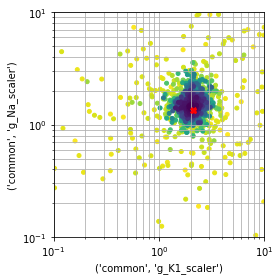

In [139]:
plt.figure(figsize=plt.figaspect(1))

name_x, name_y = ('common', 'g_K1_scaler'), ('common', 'g_Na_scaler')
#name_x, name_y = ('1032', 'K_i'), ('1032', 'Na_i')

epoch = 0

df = dump.loc[epoch][::-1]
#c = np.arange(len(df)) # np.log(-df['common', 'fitness'])

scat = plt.scatter(df[name_x], df[name_y], c=df.index, s=16)
line_best, = plt.plot(df[name_x].loc[0],
                      df[name_y].loc[0], 'Xr')

if genes[name_x[0]][name_x[1]].get('is_multiplier', False):
    plt.xscale('log')
if genes[name_y[0]][name_y[1]].get('is_multiplier', False):
    plt.yscale('log')

plt.xlabel(name_x)
plt.ylabel(name_y)

plt.xlim(genes[name_x[0]][name_x[1]]['bounds'])
plt.ylim(genes[name_y[0]][name_y[1]]['bounds'])

plt.grid(which='both')
plt.tight_layout()
#plt.gcf().align_labels()

dirname = os.path.join("../images/kernik/syn/", case, 'pairplots', "_".join(name_x + name_y))
os.makedirs(dirname, exist_ok=True)

for epoch in tqdm(range(0, dump.index[-1][0])):
    df = dump.loc[epoch][::-1]
    #c = np.arange(len(df)) # np.log(-df['common', 'fitness'])
    scat.set_offsets(df[[name_x, name_y]])
    scat.set_array(df.index)
    line_best.set_data(df[name_x].loc[0], df[name_y].loc[0])
    plt.savefig(os.path.join(os.path.join(dirname, f"pairplot_{epoch:04d}.png")), dpi=200)

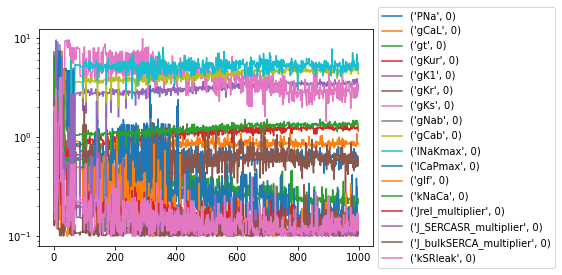

In [20]:
df = dump.loc[idx[:, 0], 'common'].unstack().iloc[:, 1:]

for key in df:
    plt.semilogy(df[key], label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Prepare baselines

In [24]:
import numpy as np
import pandas as pd
import ctypes
import matplotlib.pyplot as plt

import time
import os

import sys
sys.path.append("../")

from src.helpers import update_array_from_kwargs, get_value_by_key

dirname = '../src/model_ctypes/_maleckar_ical_ghk_tor/'
filename_so = os.path.join(dirname, 'maleckar.so')

dirname = '../src/model_ctypes/_koivumaki/'
filename_so = os.path.join(dirname, 'koivumaki.so')

dirname = '../src/model_ctypes/_kernik_clancy/'
filename_so = os.path.join(dirname, 'model.so')

filename_so_abs = os.path.abspath(filename_so)

model = ctypes.CDLL(filename_so_abs)

# model.initialize_states_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_states_default.restype = ctypes.c_void_p


# model.initialize_constants_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_constants_default.restype = ctypes.c_void_p


# model.computeRates.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeRates.restype = ctypes.c_void_p


# model.computeVariables.argtypes = [
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]
# model.computeVariables.restype = ctypes.c_void_p


model.run.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')#,
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.run.restype = ctypes.c_int



# model.run_chain.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     ctypes.c_int,
#     ctypes.c_double,
#     ctypes.c_double,
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
# ]

# model.run_chain.restype = ctypes.c_int


# legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')
# legend_algebraic = legend_algebraic.iloc[:, :0]
# legend_algebraic['value'] = 0.0

legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value']
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value']

In [25]:
# S = np.zeros(len(legend_states)) #  np.loadtxt("S.txt")
# C = np.zeros(len(legend_constants)) #  np.loadtxt("C.txt")

# model.initialize_states_default(S)
# model.initialize_constants_default(C)

In [26]:
# S = legend_states.copy()
# C = legend_constants.copy()

# A = legend_algebraic.copy()
# R = np.zeros(len(legend_states))

In [27]:
output = output_list[0]

genes = output['dump_last'].iloc[0, 1:]
phenotype_model_last = output['phenotype_model_last']
config = output['config']

state = pd.DataFrame({exp_cond_name: phenotype_model_last[exp_cond_name].iloc[-1]
                      for exp_cond_name in config['experimental_conditions'] if exp_cond_name != 'common'})

C, S = create_C_S(dict(genes=genes, state=state), config, '500')

stim_flag 2
i_stim_Amplitude 30
stim_period 500


In [33]:
C['g_K1'] *= 100

KeyError: 'g_K1'

In [50]:
C['g_K1'] *= 0.5
C['P_Na'] *= 0.6
C['g_Ca_L'] *= 0.5
#P_Ca_L_ToR_ORd*0.5

In [197]:
# C['stim_amplitude'] *= 2
# C['stim_amplitude']

In [7]:
S = legend_states.copy()
C = legend_constants.copy()

In [53]:
C['stim_amplitude'] = -180

In [98]:
C['stim_period'] = 1
C['stim_duration'] = 0.001
C['stim_amplitude'] = -60
#C['pca_tor'] = 0 # 5e-5 * 4
#C['g_Ca_L'] = 3 * 6.75

In [143]:
C['pca_tor'] = 5e-5 * 4


In [198]:
C['stim_period'] = 1

In [184]:
#C.to_csv("../../../projects/Rheeda/G3C1/andrey_constants.csv")

In [28]:
# t_sampling = 0.001 # 0.001
t_sampling = 1

#stim_period = C['stim_period'] # C[config['stim_period_legend_name']]
stim_period = C[config['stim_period_legend_name']] # C[config['stim_period_legend_name']]
#stim_period = get_value_by_key(C, legend_constants, 'stim_period')
n_samples_per_stim = int(stim_period / t_sampling)

n_beats = 100
tol = 1e-6

chain_length = 200
v_threshold = 1e-1
t_safe = 5e-2

output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
#output_A = np.zeros((n_samples_per_stim * n_beats + 1, 107))
#output_t = np.zeros((n_samples_per_stim * n_beats + 1))

In [55]:
status = model.run_chain(S.values.copy(), C.values.copy(),
                         chain_length, v_threshold, t_safe,
                         n_beats, t_sampling, tol, output)

print(status)

2


In [29]:
status = model.run(S.values.copy(), C.values.copy(),
                   n_beats, t_sampling, tol, output)

print(status)

2


In [30]:
#output = np.loadtxt(os.path.join(dirname, "output.txt"))

In [31]:
output = pd.DataFrame(output, columns=legend_states.index)

In [32]:
output.head()

name,V,Ca_SR,Cai,Nai,Ki,Ca_ligand,d,f1,fCa,Xr1,...,Xf,s,r,dCaT,fCaT,R,O,I,a_ur,i_ur
0,-76.979831,0.145664,0.000151,5.027152,105.154729,0.0,0.000323,0.322561,0.993439,0.063052,...,0.017350,0.960357,0.000236,0.000215,0.924860,0.012763,0.000063,0.004872,0.000260,0.537799
1,-71.105878,0.145663,0.000150,5.027168,105.154759,0.0,0.000360,0.323837,0.993654,0.062192,...,0.017423,0.960749,0.000248,0.000433,0.924532,0.012805,0.000063,0.004839,0.000267,0.537930
2,-52.988332,0.145663,0.000150,5.027244,105.154755,0.0,0.001196,0.324860,0.993801,0.061599,...,0.017437,0.960276,0.000400,0.005312,0.912854,0.012847,0.000063,0.004807,0.000400,0.538065
3,-18.775172,0.145662,0.000154,5.032383,105.154802,0.0,0.081320,0.324009,0.993715,0.061933,...,0.017374,0.953210,0.003796,0.431535,0.807655,0.012884,0.000063,0.004790,0.008198,0.538182
4,-14.526558,0.145662,0.000175,5.033407,105.154860,0.0,0.299790,0.321241,0.990653,0.063317,...,0.017270,0.936766,0.013507,0.805762,0.602158,0.012874,0.000065,0.004948,0.037834,0.538238


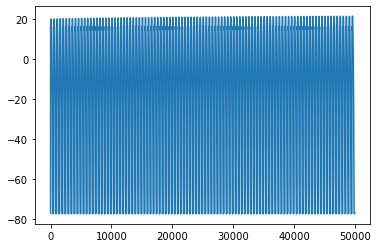

In [33]:
plt.plot(output.V)

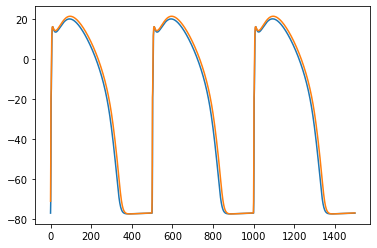

In [34]:
plt.plot(output.V[:1500].values)
plt.plot(output.V[-1500:].values)

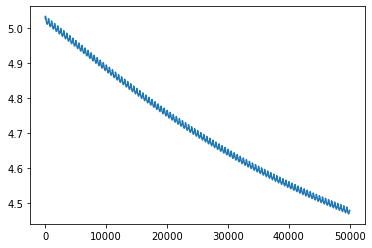

In [35]:
# plt.plot(output.Na_i)
plt.plot(output.Nai)

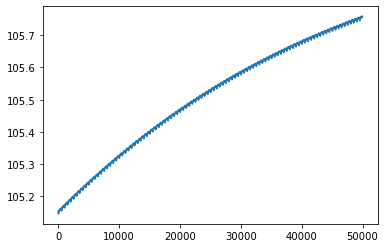

In [36]:
plt.plot(output.Ki)

In [37]:
# plt.plot(output.Ca_up)
# plt.plot(output.Ca_rel)

In [149]:
A = legend_algebraic.values.flatten()
R = np.zeros(len(legend_states))

#output = df.copy()
A_list = np.zeros((len(output), len(A)))

for i in range(len(output)):
    model.computeVariables(0, C.values, R, output.iloc[i].values, A)
    A_list[i] = A.copy()

In [153]:
A = pd.DataFrame(A_list, columns=legend_algebraic.index)

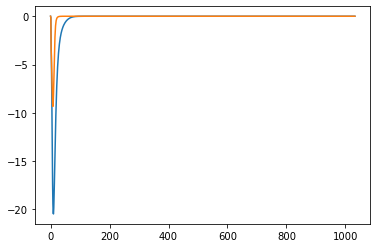

In [154]:
plt.plot(A.i_Ca_L)
plt.plot(A.ical_tor)

#plt.xlim(990, 1200)

In [207]:
#output.to_csv("../../../projects/Rheeda/G3C1/andrey_normal.csv", index=False)

In [208]:
tail = output[-1000 * 10 - 1:].reset_index()

In [209]:
tail

name,index,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,...,O_C,O_TC,O_TMgC,O_TMgMg,O,Ca_rel,Ca_up,O_Calse,F1,F2
0,990000,-55.024745,140.021349,5.633908,0.032331,0.164876,0.158473,0.000055,0.000358,0.979689,...,0.009905,0.004740,0.154520,0.634265,1.375071,0.246570,0.247918,0.228319,0.522022,0.000090
1,990001,11.169576,140.017669,5.634408,0.986784,0.037737,0.134569,0.000143,0.097267,0.944823,...,0.009963,0.004763,0.154520,0.634270,1.375075,0.246578,0.248145,0.228323,0.522408,0.000091
2,990002,13.269086,140.016601,5.634553,0.992760,0.001347,0.096423,0.001218,0.417354,0.855242,...,0.010079,0.004812,0.154543,0.634258,1.375088,0.246587,0.248714,0.228328,0.522627,0.000256
3,990003,11.979645,140.016928,5.634508,0.991589,0.000049,0.069091,0.002852,0.620633,0.774190,...,0.010205,0.004867,0.154579,0.634236,1.375104,0.246059,0.249458,0.228294,0.520073,0.003156
4,990004,9.642786,140.017446,5.634438,0.988886,0.000003,0.049506,0.004627,0.744745,0.700956,...,0.011123,0.005244,0.154821,0.634135,1.375214,0.236759,0.253438,0.227148,0.510471,0.012895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999996,-55.017970,140.020334,5.631853,0.032357,0.164676,0.158123,0.000055,0.000358,0.979657,...,0.009901,0.004738,0.154499,0.634280,1.375067,0.246396,0.247804,0.228193,0.520465,0.000090
9997,999997,-55.018539,140.020317,5.631856,0.032354,0.164697,0.158181,0.000055,0.000358,0.979662,...,0.009901,0.004737,0.154484,0.634291,1.375065,0.246401,0.247795,0.228197,0.520852,0.000090
9998,999998,-55.019102,140.020300,5.631858,0.032352,0.164717,0.158239,0.000055,0.000358,0.979666,...,0.009900,0.004737,0.154470,0.634302,1.375062,0.246407,0.247785,0.228202,0.521240,0.000090
9999,999999,-55.019658,140.020283,5.631860,0.032350,0.164738,0.158297,0.000055,0.000358,0.979671,...,0.009900,0.004737,0.154456,0.634313,1.375060,0.246412,0.247776,0.228206,0.521627,0.000090


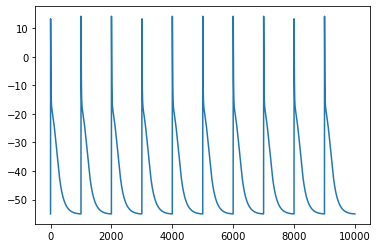

In [210]:
plt.plot(tail.V)

In [211]:
# tail.to_csv("../../../projects/Rheeda/G3C1/andrey_fibrosis.csv", index=False)

In [212]:
tail

name,index,V,Na_c,Na_i,m,h1,h2,Ca_d,d_L,f_L1,...,O_C,O_TC,O_TMgC,O_TMgMg,O,Ca_rel,Ca_up,O_Calse,F1,F2
0,990000,-55.024745,140.021349,5.633908,0.032331,0.164876,0.158473,0.000055,0.000358,0.979689,...,0.009905,0.004740,0.154520,0.634265,1.375071,0.246570,0.247918,0.228319,0.522022,0.000090
1,990001,11.169576,140.017669,5.634408,0.986784,0.037737,0.134569,0.000143,0.097267,0.944823,...,0.009963,0.004763,0.154520,0.634270,1.375075,0.246578,0.248145,0.228323,0.522408,0.000091
2,990002,13.269086,140.016601,5.634553,0.992760,0.001347,0.096423,0.001218,0.417354,0.855242,...,0.010079,0.004812,0.154543,0.634258,1.375088,0.246587,0.248714,0.228328,0.522627,0.000256
3,990003,11.979645,140.016928,5.634508,0.991589,0.000049,0.069091,0.002852,0.620633,0.774190,...,0.010205,0.004867,0.154579,0.634236,1.375104,0.246059,0.249458,0.228294,0.520073,0.003156
4,990004,9.642786,140.017446,5.634438,0.988886,0.000003,0.049506,0.004627,0.744745,0.700956,...,0.011123,0.005244,0.154821,0.634135,1.375214,0.236759,0.253438,0.227148,0.510471,0.012895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999996,-55.017970,140.020334,5.631853,0.032357,0.164676,0.158123,0.000055,0.000358,0.979657,...,0.009901,0.004738,0.154499,0.634280,1.375067,0.246396,0.247804,0.228193,0.520465,0.000090
9997,999997,-55.018539,140.020317,5.631856,0.032354,0.164697,0.158181,0.000055,0.000358,0.979662,...,0.009901,0.004737,0.154484,0.634291,1.375065,0.246401,0.247795,0.228197,0.520852,0.000090
9998,999998,-55.019102,140.020300,5.631858,0.032352,0.164717,0.158239,0.000055,0.000358,0.979666,...,0.009900,0.004737,0.154470,0.634302,1.375062,0.246407,0.247785,0.228202,0.521240,0.000090
9999,999999,-55.019658,140.020283,5.631860,0.032350,0.164738,0.158297,0.000055,0.000358,0.979671,...,0.009900,0.004737,0.154456,0.634313,1.375060,0.246412,0.247776,0.228206,0.521627,0.000090


In [38]:
err_abs = output.iloc[-1] - output.iloc[0]
err_rel = err_abs / output.iloc[0] * 100

In [39]:
items = ['Na_i', 'K_i', 'V', 'Ca_i']
items = ['Nai', 'Ki']

df_err= pd.DataFrame([err_rel[items], err_abs[items]],
                     index=['err_rel', 'err_abs'])
df_err

name,Nai,Ki
err_rel,-10.922821,0.574029
err_abs,-0.549107,0.603619


# 3D

spherical stimulus of radius 0.75mm

stimulus[0].strength     = 3e2 units: uA/cm^3(3D current)

stimulus[0].duration     = 5 [ms]

$(100 um)^3 \cdot 300 uA / cm^3 = (10^2 \cdot 10^{-6} m)^3 \cdot 3 \cdot 10^{-4} \cdot 10^6 A/m^{-3} = 10^{-12} m^3 \cdot 3 \cdot 10^2 A / m^3 = 3 \cdot 10^{-10} A = 10 nA$

Cm = 0.05 nF

In [104]:
def calculate_diffusion(V, g_gap_junc_tensor):
        
    I = np.zeros_like(V)
        
    for axis in range(V.ndim):

        indices_next, indices_prev = [slice(None)] * 3, [slice(None)] * 3
        indices_next[axis] = slice(1, None)        
        indices_prev[axis] = slice(0, -1)
        indices_next = tuple(indices_next)
        indices_prev = tuple(indices_prev)

        I[indices_next] = I[indices_next] - g_gap_junc_tensor[axis] * (V[indices_prev] - V[indices_next])
        I[indices_prev] = I[indices_prev] - g_gap_junc_tensor[axis] * (V[indices_next] - V[indices_prev])
            
    return I


def is_pacing_condition(t, ix, iy, iz, SIZE, stim_size):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE

    pacing_condition =  (X_SIZE / 2 - stim_size / 2 <= ix <= X_SIZE / 2 + stim_size / 2)
    pacing_condition &= (Y_SIZE / 2 - stim_size / 2 <= iy <= Y_SIZE / 2 + stim_size / 2)
    pacing_condition &= (iz == 0)

    pacing_condition &= t < 5e-3
    
    return pacing_condition


def is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R):
    
    X_SIZE, Y_SIZE, Z_SIZE = SIZE
    
    x_center, y_center, z_center = X_SIZE / 2, Y_SIZE / 2, 0

    pacing_condition =  (ix - x_center)**2 + (iy - y_center)**2 + (iz - z_center)**2 < R**2
    pacing_condition &= t < 5e-3
    
    return pacing_condition

In [105]:
dt = 2e-5

t_end = 2e-2
t_sampling = 1e-4

sigma_l = 0.126  # S/m
h = 100  # um

g_gap_junc = sigma_l * h # 5.0
g_gap_junc_tensor = [g_gap_junc,
                     g_gap_junc / 5,
                     g_gap_junc / 5]

N = int(t_end / dt)
step_print = int(t_sampling / dt)


X_SIZE, Y_SIZE, Z_SIZE = 61, 41, 21
SIZE = X_SIZE, Y_SIZE, Z_SIZE

A = np.zeros(70)
R = np.zeros_like(S)

S_tissue = np.tile(S.values, (*SIZE, 1))
C_tissue = np.tile(C.values, (*SIZE, 1))
C_tissue[:, :, :, 7] = 0
R_tissue = np.zeros_like(S_tissue)
A_tissue = np.tile(A, (*SIZE, 1))

result = np.zeros((*SIZE, int(t_end / t_sampling)))
i_print = 0
t = 0

stim_size = 10

In [106]:
IS_PARALLEL = False

for it in tqdm(range(N)):
    
    if it % step_print == 0:
        result[:, :, :, i_print] = S_tissue[:, :, :, 0]
        i_print += 1
        
    if IS_PARALLEL:

        C_tissue[X_SIZE / 2 - stim_size / 2: X_SIZE / 2 + stim_size / 2,
                 Y_SIZE / 2 - stim_size / 2: Y_SIZE / 2 + stim_size / 2,
                 0, 7] = -300 if t < 5e-3 else 0 

        args = zip([t] * (X_SIZE * Y_SIZE * Z_SIZE),
                   C_tissue.reshape(-1, C_tissue.shape[-1]),
                   R_tissue.reshape(-1, R_tissue.shape[-1]),
                   S_tissue.reshape(-1, S_tissue.shape[-1]),
                   A_tissue.reshape(-1, A_tissue.shape[-1]))

        with Pool(2) as p:
            R_list = p.map(f, args)

        R_tissue = np.array(R_list).reshape(R_tissue.shape)
        
    else:

        for ix in range(X_SIZE):
            for iy in range(Y_SIZE):
                for iz in range(Z_SIZE):

                    stim_amplitude = -200
                    #C['stim_amplitude'] = stim_amplitude if is_pacing_condition(t, ix, iy, iz, SIZE, stim_size) else 0
                    C['stim_amplitude'] = stim_amplitude if is_pacing_condition_sphere(t, ix, iy, iz, SIZE, R=7.5) else 0


                    model.computeRates(t,
                                       C.values,
                                       R_tissue[ix, iy, iz],
                                       S_tissue[ix, iy, iz],
                                       A.copy())

    V = S_tissue[:, :, :, 0]
    assert not np.any(np.isnan(V))
    I_gap_junc = calculate_diffusion(V, g_gap_junc_tensor)
    
    R_tissue[:, :, :, 0] = R_tissue[:, :, :, 0] - I_gap_junc * 1000
    
    S_tissue = S_tissue + dt * R_tissue            
    t += dt

  0%|          | 0/999 [00:00<?, ?it/s]

ArgumentError: argument 4: <class 'KeyboardInterrupt'>: 

In [107]:
ixc, iyc, izc = map(lambda x: int(x // 2), SIZE)
ic = ixc, iyc, izc

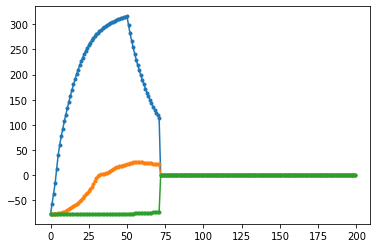

In [108]:
plt.plot(result[ixc, iyc, 0], '.-')
plt.plot(result[ic], '.-')
plt.plot(result[ixc, iyc, -1], '.-')

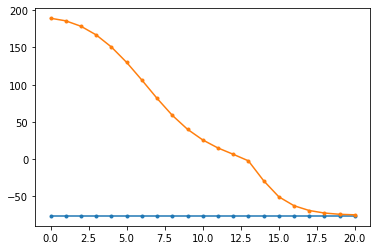

In [112]:
plt.plot(result[ixc, iyc, :, 0], '.-')
plt.plot(result[ixc, iyc, :, 60], '.-')

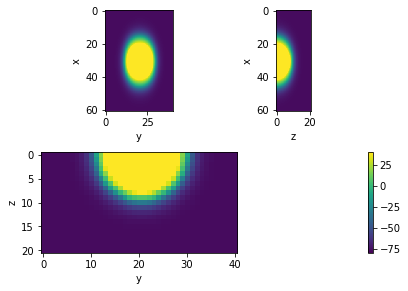

In [116]:
fig, axes = plt.subplots(2, 2,
                        #sharex='col', sharey='row',
                        )

t = 25

axes[0, 0].imshow(result[:, :, 0, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )
axes[0, 0].set_xlabel('y')
axes[0, 0].set_ylabel('x')

axes[0, 1].imshow(result[:, iyc, :, t],
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('x')

im = axes[1, 0].imshow(result[ixc, :, :, t].T,
           vmin=-80, vmax=40,
           #aspect=10,
          )

axes[1, 0].set_xlabel('y')
axes[1, 0].set_ylabel('z')

axes[1, 1].set_visible(False)

plt.colorbar(im)

plt.tight_layout()

# Profiling

In [23]:
# l = []
# for i in range(128):
#     df = pd.read_csv(os.path.join(config_path, f"mpi/report_{i:04d}.csv")).iloc[1:]
#     df['rank'] = i
#     l.append(df)
    
# df = pd.concat(l)
# #df.set_index('rank', append=True, inplace=True)

In [24]:
# sns.barplot(y='gather_allgather', data=df, x='rank', palette="Blues")
# #sns.barplot(y='calc', data=df, x='rank', palette="Reds")